# Notebook 1: Loading the CMIP data 

In this notebook, we focus on loading in the data from the CMIP6 site. We can then work on histogramming the data in order to understand the variability within the models

*Most of the code is from project pythia

In [3]:
# Import statements
import xarray as xr
xr.set_options(display_style='html')
import intake
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
514813,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514814,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514815,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514816,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [3]:
cmipdf = col.df
cmipdf['source_id'].unique()

array(['CMCC-CM2-HR4', 'EC-Earth3P-HR', 'HadGEM3-GC31-MM',
       'HadGEM3-GC31-HM', 'HadGEM3-GC31-LM', 'EC-Earth3P', 'ECMWF-IFS-HR',
       'ECMWF-IFS-LR', 'HadGEM3-GC31-LL', 'CMCC-CM2-VHR4', 'GFDL-CM4',
       'GFDL-AM4', 'IPSL-CM6A-LR', 'E3SM-1-0', 'CNRM-CM6-1', 'GFDL-ESM4',
       'GFDL-ESM2M', 'GFDL-CM4C192', 'GFDL-OM4p5B', 'GISS-E2-1-G',
       'GISS-E2-1-H', 'CNRM-ESM2-1', 'BCC-CSM2-MR', 'BCC-ESM1', 'MIROC6',
       'AWI-CM-1-1-MR', 'EC-Earth3-LR', 'IPSL-CM6A-ATM-HR', 'CESM2',
       'CESM2-WACCM', 'CNRM-CM6-1-HR', 'MRI-ESM2-0', 'SAM0-UNICON',
       'GISS-E2-1-G-CC', 'UKESM1-0-LL', 'EC-Earth3', 'EC-Earth3-Veg',
       'FGOALS-f3-L', 'CanESM5', 'CanESM5-CanOE', 'INM-CM4-8',
       'INM-CM5-0', 'NESM3', 'MPI-ESM-1-2-HAM', 'CAMS-CSM1-0',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'MRI-AGCM3-2-H', 'MRI-AGCM3-2-S',
       'MCM-UA-1-0', 'INM-CM5-H', 'KACE-1-0-G', 'NorESM2-LM',
       'FGOALS-f3-H', 'FGOALS-g3', 'MIROC-ES2L', 'FIO-ESM-2-0', 'NorCPM1',
       'NorESM1-F', 'MPI-ESM1-2-XR'

From above, we know that we need 3 specific models/source_ids: CanESM5, HadGEM3-GC31-MM, GISS-E2-1-H. In addition to this, we know that we want monthly precipitation data, so we need variable_id = "pr" and table_id = "Amon". Lastly, we'll also need the historical data at this point.

# CanESM5

We want an approximate box of 115 to 135 lon and 49 to 60 lat, and we want a slice from 1960 to 2010

In [9]:
write = False
if write:
    can_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "CanESM5", experiment_id = 'historical')
    dset_dict = can_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    can_dset = dset_dict['CMIP.CCCma.CanESM5.historical.Amon.gn']
    can_bc_dset = can_dset.sel(lon = slice(115.3125, 135.), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    can_bc_dset.to_netcdf("can_bc_dset.nc")
    

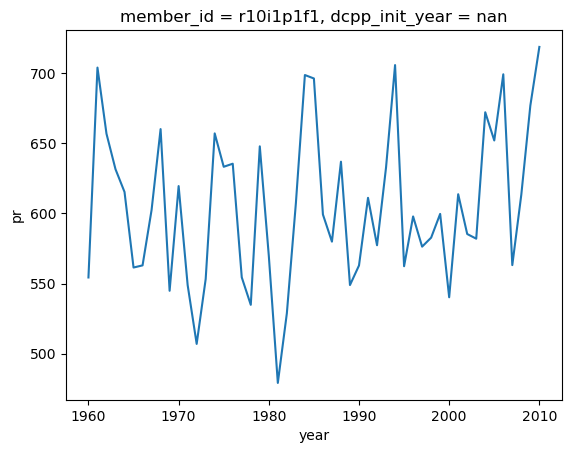

In [7]:
# # Need to figure out how to take a yearly average, and plot that as a time series
# test1 = bc_dset.sel(member_id='r10i1p1f1')
# test1 *= 86400*30.4
# test2 = test1.groupby('time.year').sum()
# test2.mean(['lon', 'lat']).pr.plot()
# # plt.title("Yearly precipitation for a certain model_id")
# # plt.xlabel('Year')
# # plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Precipitation total (mm)')

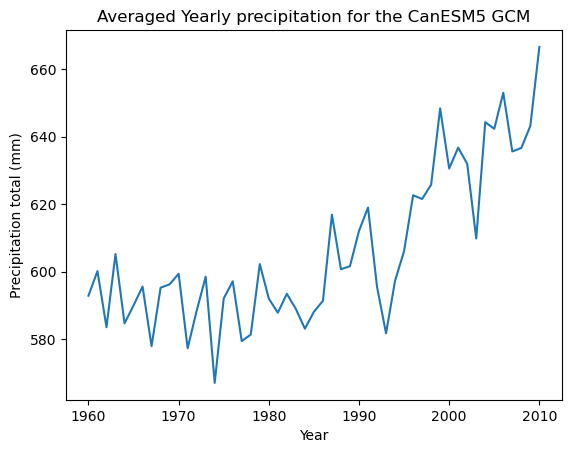

In [19]:
bc_dset = xr.open_dataset('can_bc_dset.nc')
mean_precip = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the CanESM5 GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Here we plot the variance without converting the units

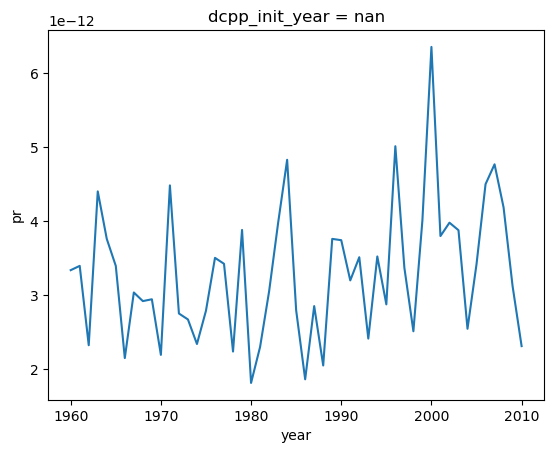

In [20]:
var_precip = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])
var_precip.var('member_id').pr.plot()

(array([  6.,  61., 212., 388., 482., 372., 189.,  60.,  14.,   1.]),
 array([1.30199396e-05, 1.43982852e-05, 1.57766299e-05, 1.71549764e-05,
        1.85333211e-05, 1.99116657e-05, 2.12900122e-05, 2.26683569e-05,
        2.40467016e-05, 2.54250481e-05, 2.68033928e-05]),
 <BarContainer object of 10 artists>)

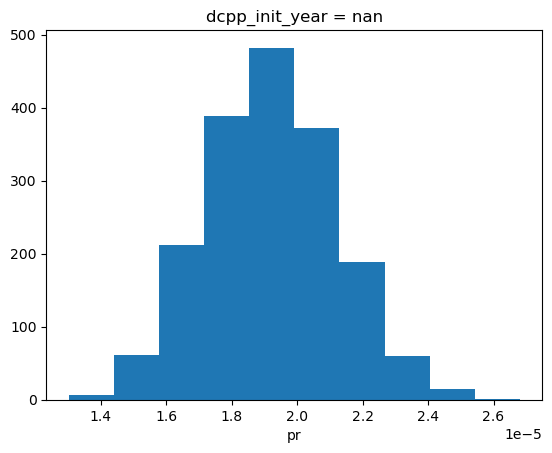

In [14]:
test_set_avg = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])
test_set_avg.pr.plot.hist()

Last thing to do now is to convert the units to mm/year

# HadGEM3

In [ ]:
hadGEM = True
if hadGEM:
    had_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "HadGEM3-GC31-MM", experiment_id = 'historical')
    dset_dict = had_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    had_dset = dset_dict['CMIP.MOHC.HadGEM3-GC31-MM.historical.Amon.gn']
    had_bc_dset = had_dset.sel(lon = slice(115.3125, 136.25), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    had_bc_dset.to_netcdf('had_bc_dset.nc')
    print('done')

Text(0, 0.5, 'Precipitation total (mm)')

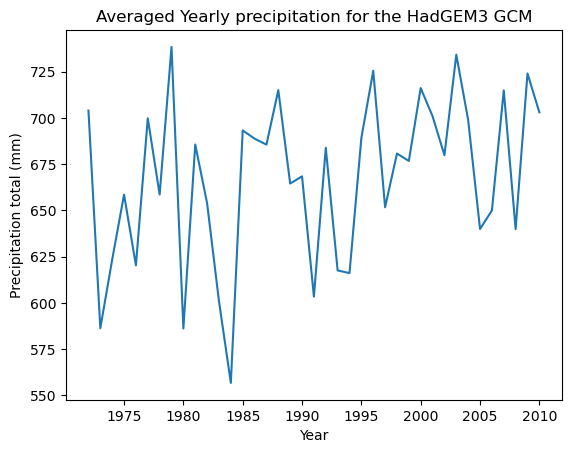

In [24]:
had_bc_dset = xr.open_dataset('had_bc_dset.nc')
mean_precip_had = had_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip_had.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the HadGEM3 GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

# GISS

In [28]:
GISS = False
if GISS:
    gis_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "GISS-E2-1-H", experiment_id = 'historical')
    dset_dict = gis_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    gis_dset = dset_dict['CMIP.NASA-GISS.GISS-E2-1-H.historical.Amon.gn']
    gis_bc_dset = gis_dset.sel(lon = slice(116.25, 135.), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    gis_bc_dset.to_netcdf('gis_bc_dset')

Text(0, 0.5, 'Precipitation total (mm)')

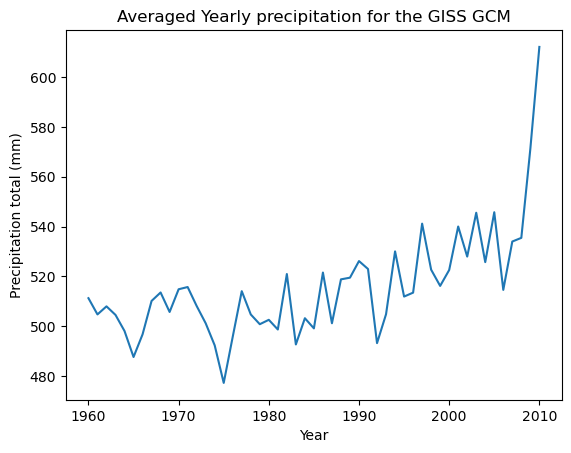

In [30]:
gis_bc_dset = xr.open_dataset('gis_bc_dset')
mean_precip_gis = gis_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip_gis.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the GISS GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

In [ ]:
# Storage code

# This just displays a time series over months and decades
# test1 = bc_dset.sel(member_id='r10i1p1f1')
# mean_precip = test1.mean(['lon', 'lat'])
# mean_precip
# # mean_precip.pr.plot()